# Importaciones necesarias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps

In [2]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

In [3]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [4]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
piloto1 = input('Piloto 1: ')
piloto2 = input('Piloto 2: ')

Año: 2022
Round: 14
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: VER
Piloto 2: PER


# Carga de la sesión

In [5]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '24', '4', '31', '16', '1', '77', '20', '6', '5', '18', '10', '3', '23', '63', '44', '14', '11', '47', '22']


# Listado de pilotos

In [6]:
drivers = pd.unique(session.laps['Driver'])
drivers
# seleccionar un solo piloto drivers[0] - SAI

array(['SAI', 'ZHO', 'NOR', 'OCO', 'LEC', 'VER', 'BOT', 'MAG', 'LAT',
       'VET', 'STR', 'GAS', 'RIC', 'ALB', 'RUS', 'HAM', 'ALO', 'PER',
       'MSC', 'TSU'], dtype=object)

# tabla de vueltas más rápidas

In [7]:
renglones = 672
x = 0 
list_quick_laps = list()
while x < 672:
    drvs_fastest_lap = lap = session.laps.pick_quicklaps(x)
    print(x)
    x += 1
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:2165: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


In [9]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [10]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:49.354000        0 days 00:00:00
1     LEC 0 days 00:01:49.984000 0 days 00:00:00.630000
2     PER 0 days 00:01:50.764000 0 days 00:00:01.410000
3     RUS 0 days 00:01:50.793000 0 days 00:00:01.439000
4     NOR 0 days 00:01:51.678000 0 days 00:00:02.324000
5     OCO 0 days 00:01:51.717000 0 days 00:00:02.363000
6     SAI 0 days 00:01:51.977000 0 days 00:00:02.623000
7     LAT 0 days 00:01:52.256000 0 days 00:00:02.902000
8     ZHO 0 days 00:01:52.317000 0 days 00:00:02.963000
9     TSU 0 days 00:01:52.436000 0 days 00:00:03.082000
10    VET 0 days 00:01:52.515000 0 days 00:00:03.161000
11    MSC 0 days 00:01:52.646000 0 days 00:00:03.292000
12    ALO 0 days 00:01:52.868000 0 days 00:00:03.514000
13    STR 0 days 00:01:52.880000 0 days 00:00:03.526000
14    GAS 0 days 00:01:53.002000 0 days 00:00:03.648000
15    ALB 0 days 00:01:53.055000 0 days 00:00:03.701000
16    RIC 0 days 00:01:53.080000 0 days 00:00:03

In [19]:
# Graficador

In [20]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    print(lap['Team'])
    if pd.isnull(lap['Team']):
        color = '#000000'
    else:
        color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

Ferrari
Ferrari
Red Bull Racing
Alpine
Alpine
Red Bull Racing
Mercedes
Alfa Romeo
Mercedes
McLaren
Aston Martin
AlphaTauri
Aston Martin
Alfa Romeo
Haas F1 Team
Williams
McLaren
Haas F1 Team
AlphaTauri
Williams


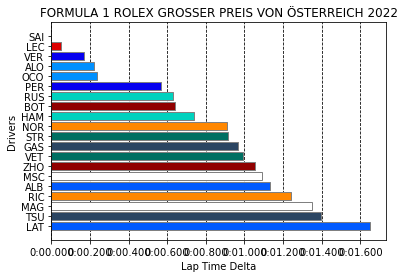

In [21]:
fig, ax = plt.subplots()
# Etiquetas Verticales | Pilotos
ax.set_yticks(fastest_laps.index,labels=fastest_laps['Driver'])
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')

ax.invert_yaxis()
# Etiquetas
ax.set_ylabel('Drivers')
ax.set_xlabel('Lap Time Delta')
session.event
ax.set_title(session.event['OfficialEventName'])
# Barras
# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
#Mostrar gráfico
plt.savefig('2022-11-VR.png')
plt.show()